In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

## 1

### a

In [2]:
Data = pd.read_csv('data/strongdrink.txt', na_values='?')

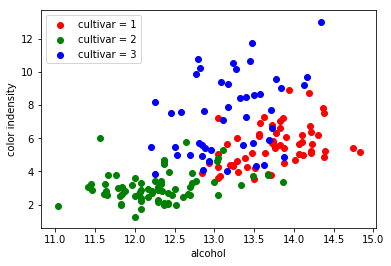

In [3]:
x = Data['alco']
y = Data['color_int']
fig,ax = plt.subplots()
ax.scatter(x[Data['cultivar']==1],y[Data['cultivar']==1], color = 'r', label = 'cultivar = 1')
ax.scatter(x[Data['cultivar']==2],y[Data['cultivar']==2], color = 'g', label = 'cultivar = 2')
ax.scatter(x[Data['cultivar']==3],y[Data['cultivar']==3], color = 'b', label = 'cultivar = 3')
ax.set_xlabel('alcohol')
ax.set_ylabel('color indensity')
ax.legend()
plt.show()

### b

In [4]:
X = Data[['alco','malic','tot_phen','color_int']].values
y = Data['cultivar'].values
LogReg = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
random_logreg = RandomizedSearchCV(LogReg, param_dist1, 
                                 n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [5]:
logreg = random_logreg.fit(X, y)
print('Optimal tuning parameter values are\n', logreg.best_params_)
print('MSE of the optimal results is', abs(logreg.best_score_))

Optimal tuning parameter values are
 {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of the optimal results is 0.11931818181818182


C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### c

In [6]:
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
random_Forest = RandomizedSearchCV(RandomForestClassifier(), param_dist2, 
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [7]:
data_random_Forest = random_Forest.fit(X, y)
print('Optimal tuning parameter values are\n', data_random_Forest.best_params_)
print('MSE of the optimal results is', abs(data_random_Forest.best_score_))

Optimal tuning parameter values are
 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
MSE of the optimal results is 0.13068181818181818


C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### d

In [8]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_SVC = RandomizedSearchCV(SVC(), param_dist3, 
                                n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [9]:
data_random_SVC = random_SVC.fit(X, y)
print('Optimal tuning parameter values are\n', data_random_SVC.best_params_)
print('MSE of the optimal results is', abs(data_random_SVC.best_score_))

Optimal tuning parameter values are
 {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE of the optimal results is 0.14772727272727273


C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### e

In [10]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
random_MLP = RandomizedSearchCV(MLPClassifier(), param_dist4, 
                                n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [11]:
data_random_MLP = random_MLP.fit(X, y)
print('Optimal tuning parameter values are\n', data_random_MLP.best_params_)
print('MSE of the optimal results is', abs(data_random_MLP.best_score_))

Optimal tuning parameter values are
 {'activation': 'logistic', 'alpha': 3.5282214264346923, 'hidden_layer_sizes': 64}
MSE of the optimal results is 0.2215909090909091


C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ccb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### f

Among logistic regression, random forest, SVM and nueral network, I think logistic regression performs the best, since it induces the smallest MSE.

Among random forest, SVM and nueral network, I think random forest performs the best, since it induce the smallest MSE.